In [1]:
%pylab inline
from jax.scipy.ndimage import map_coordinates
from constant import *
import warnings
from jax import jit, partial, vmap
from tqdm import tqdm
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


### State 
$$x = [w,n,m,s,e,o]$$   
$w$: wealth level    size: 20   
$n$: 401k level      size: 10   
$m$: mortgage level  size: 10   
$s$: economic state  size: 8   
$e$: employment state size: 2   
$o$: housing state:  size: 2   

### Action
$c$: consumption amount size: 20   
$b$: bond investment size: 20   
$k$: stock investment derived from budget constrain once $c$ and $b$ are determined.    
$h$: housing consumption size, related to housing status and consumption level   

If $O = 1$, the agent owns a house:    
$A = [c, b, k, h=H, action = 1]$ sold the house    
$A = [c, b, k, h=H, action = 0]$ keep the house   

If $O = 0$, the agent do not own a house:   
$A = [c, b, k, h= \frac{c}{\alpha} \frac{1-\alpha}{pr}, action = 0]$ keep renting the house   
$A = [c, b, k, h= \frac{c}{\alpha} \frac{1-\alpha}{pr}, action = 1]$ buy a housing with H unit     

### Housing
20% down payment of mortgage, fix mortgage rate, single housing unit available, from age between 20 and 50, agents could choose to buy a house, and could choose to sell the house at any moment.  $H = 1000$ 

In [2]:
%%time
for t in tqdm(range(T_max-1,T_min-1, -1)):
    if t == T_max-1:
        v,cbkha = vmap(partial(V,t,Vgrid[:,:,:,:,:,:,t]))(Xs)
    else:
        v,cbkha = vmap(partial(V,t,Vgrid[:,:,:,:,:,:,t+1]))(Xs)
    Vgrid[:,:,:,:,:,:,t] = v.reshape(dim)
    cgrid[:,:,:,:,:,:,t] = cbkha[:,0].reshape(dim)
    bgrid[:,:,:,:,:,:,t] = cbkha[:,1].reshape(dim)
    kgrid[:,:,:,:,:,:,t] = cbkha[:,2].reshape(dim)
    hgrid[:,:,:,:,:,:,t] = cbkha[:,3].reshape(dim)
    agrid[:,:,:,:,:,:,t] = cbkha[:,4].reshape(dim)

100%|██████████| 60/60 [55:09<00:00, 55.16s/it]

CPU times: user 1d 4h 9min 28s, sys: 2h 52min 57s, total: 1d 7h 2min 25s
Wall time: 55min 9s


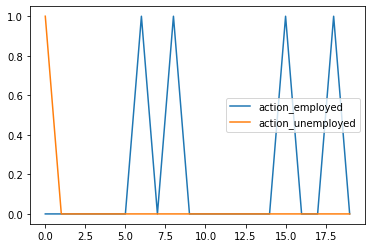

In [3]:
'''
    x = [w,n,m,s,e,o]
'''
wealthLevel = 6
retirement = 4
mortgage = 0
econState = 4
employ = 1
house = 1

# plt.figure(figsize = [12,6])
# plt.plot(cgrid[wealthLevel,retirement,mortgage,econState,employ,house,:], label = "consumption")
# plt.plot(bgrid[wealthLevel,retirement,mortgage,econState,employ,house,:], label = "bond")
# plt.plot(kgrid[wealthLevel,retirement,mortgage,econState,employ,house,:], label = "stock")
# plt.plot(hgrid[wealthLevel,retirement,mortgage,econState,employ,house,:], label = "housing")
plt.plot(agrid[:,retirement,mortgage,econState,1,house,15], label = "action_employed")
plt.plot(agrid[:,retirement,mortgage,econState,0,house,15], label = "action_unemployed")
legend()

In [4]:
np.save("Value",Vgrid)
np.save("cgrid",cgrid)
np.save("bgrid",bgrid)
np.save("kgrid",kgrid)
np.save("hgrid",hgrid)
np.save("agrid",agrid)

In [7]:
welfare/pr

500.0